# Data Analysis
*By: McKenzie Quinn*

Based on the data proviede there is a variety of information that can be drawn. That informatiation includes locations where all users use OSXtern, the frequence of use, peak times of the applciations use, and locations of specific user use.

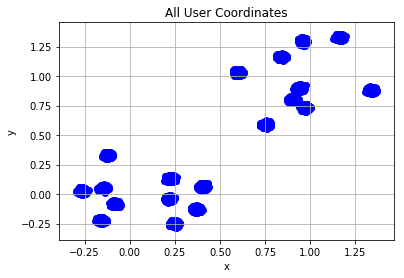

In [11]:
import csv
import numpy as np
import matplotlib.pyplot as plt
dataset = open ('checkin_dataset.csv')
csv_dataset = csv.reader(dataset)

x = []
y = []
for i in csv_dataset:
    x.append(i[3])
    y.append(i[4])
x.remove('xcoordinate')
y.remove('ycoordinate')

x = [float(i) for i in x]
y = [float(i) for i in y]
plt.scatter(x,y, color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('All User Coordinates')
plt.grid(True)
plt.show()



From all the data given from the 100 users, we can se from the graph above that OSXtern is being used in location hubs. Either the same user is using it multiple times in the same area, or multiple users are using it at multiple times in the same area. Regardless, these clusters represent an area where the app is in frequent use. We can then scale the graph accordingly, set it at the approriate origin and overlay the scatter plot above with a city map to determine the specific locations.  These finding could help in marketing OSXtern to others who could benefit from using OSXtern and stay linked to the Indy tech community.

Due to some problems in using R in jupyter, I copied the code I did in Rstudio which is what is below, along with its output.

> checkin_dataset <- read_csv("~/Downloads/checkin_dataset.csv")
Parsed with column specification:
cols(
  X1 = col_integer(),
  user = col_integer(),
  timestamp = col_datetime(format = ""),
  xcoordinate = col_double(),
  ycoordinate = col_double()
)
Warning message:
Missing column names filled in: 'X1' [1] 
> View(checkin_dataset)

> table(checkin_dataset$user)

![title](R_output.png)



From the code ran in R, we can see the frequency a user used OSXtern. The app was used atleast 87 times by a given user and at most 1199 times. Since there is such a range in uses, I plan to look closely at User 0 and User 48.

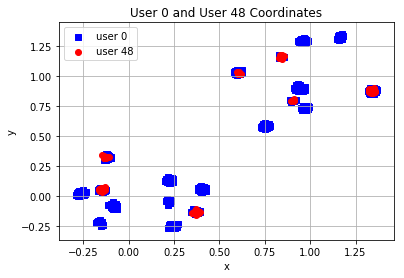

In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt
dataset = open ('checkin_dataset.csv')
csv_dataset = csv.reader(dataset)

user0_x = []
user0_y = []
user48_x = []
user48_y = []
for i in csv_dataset:
    if i[1] == '0':
        user0_x.append(i[3])
        user0_y.append(i[4])
    elif i[1] == '48':
        user48_x.append(i[3])
        user48_y.append(i[4])
    
user0_x = [float(i) for i in user0_x]
user0_y = [float(i) for i in user0_y]
user48_x = [float(i) for i in user48_x]
user48_y = [float(i) for i in user48_y]

plt.scatter(user0_x, user0_y, c='b', marker="s", label='user 0')
plt.scatter(user48_x,user48_y, c='r', marker="o", label='user 48')
plt.legend(loc='upper left');
plt.xlabel('x')
plt.ylabel('y')
plt.title('User 0 and User 48 Coordinates')
plt.grid(True)
plt.show()




Based on the graph above, we can see where user 0 and user 48 overlap in location of their OSXtern app usage. If we had to select smaller area to advertise to, I would recommend the areas where user 0 and 48 overlap since user 48 had the smallest amount of uses, it is more likely that those with more usage also spend time at those locations.

In [109]:
import csv
import numpy as np
import matplotlib.pyplot as plt
dataset = open ('checkin_dataset.csv')
csv_dataset = csv.reader(dataset)

may_usage = 0
may_earlymorning = 0
may_morning = 0
may_afternoon = 0
may_evening = 0

june_usage = 0
june_earlymorning = 0
june_morning = 0
june_afternoon = 0
june_evening = 0

july_usage = 0
july_earlymorning = 0
july_morning = 0
july_afternoon = 0
july_evening = 0

total = 0
#for i in csv_dataset:
  #  print(i)
for i in csv_dataset:
    total += 1
    if i[2][6] == '5':
        may_usage += 1
        if i[2][11] == '0' and i[2][12] <= '5':
            may_earlymorning +=1
        elif (i[2][11] =='0' and i[2][12] >= '6') or (i[2][11] =='1' and i[2][12] <= '1'):
            may_morning += 1
        elif i[2][11] =='1' and (i[2][12] >= '2' and i[2][12] <= '7'):
            may_afternoon += 1
        elif (i[2][11] =='1' or i[2][11] =='2' ) and (i[2][12] >= '8' or i[2][12] <='3'):
            may_evening += 1
            
    elif i[2][6] == '6':
        june_usage +=1
        if i[2][11] == '0' and i[2][12] <= '5':
            june_earlymorning +=1
        elif (i[2][11] =='0' and i[2][12] >= '6') or (i[2][11] =='1' and i[2][12] <= '1'):
            june_morning += 1
        elif i[2][11] =='1' and (i[2][12] >= '2' and i[2][12] <= '7'):
            june_afternoon += 1
        elif (i[2][11] =='1' or i[2][11] =='2' ) and (i[2][12] >= '8' or i[2][12] <='3'):
            june_evening += 1
    elif i[2][6] == '7':
        july_usage +=1
        if i[2][11] == '0' and i[2][12] <= '5':
            july_earlymorning +=1
        elif (i[2][11] =='0' and i[2][12] >= '6') or (i[2][11] =='1' and i[2][12] <= '1'):
            july_morning += 1
        elif i[2][11] =='1' and (i[2][12] >= '2' and i[2][12] <= '7'):
            july_afternoon += 1
        elif (i[2][11] =='1' or i[2][11] =='2' ) and (i[2][12] >= '8' or i[2][12] <='3'):
            july_evening += 1

earlymorning = may_earlymorning + june_earlymorning + july_earlymorning
morning = may_morning + june_morning + july_morning 
afternoon = may_afternoon +june_afternoon + july_afternoon
evening = may_evening + june_evening + july_evening

print('{:5}{:10} {:10} {:15}{:20}{}'.format('','|12:00am -5:59am|', ' 6:00am-11:59am|', '12:00pm-5:59pm|','6:00pm-11:59pm|','Total|'))
print ('-'*80)
print('{:5}{:10}{:1}{:10}{:1}{:10}{:1}{:10}{:1}{:10}{:1}'.format('May  |', may_earlymorning,'     |', may_morning, '      |', may_afternoon,'     |', may_evening,'    |', may_usage, '|'))
print('{:5}{:10}{:1}{:10}{:1}{:10}{:1}{:10}{:1}{:10}{:1}'.format('June |', june_earlymorning,'     |', june_morning,'      |', june_afternoon, '     |', june_evening ,'    |', june_usage, '|'))
print('{:5}{:10}{:1}{:10}{:1}{:10}{:1}{:10}{:1}{:10}{:1}'.format('July |', july_earlymorning, '     |', july_morning, '      |', july_afternoon, '     |', july_evening, '    |', july_usage, '|'))
print ('-'*80)
print('{:5}{:10}{:1}{:10}{:1}{:10}{:1}{:10}{:1}{:10}{:1}'.format('Total|', earlymorning , '     |', morning, '      |',afternoon,  '     |',evening ,'    |', total,'|'))



     |12:00am -5:59am|  6:00am-11:59am| 12:00pm-5:59pm|6:00pm-11:59pm|     Total|
--------------------------------------------------------------------------------
May  |      1968     |      2068      |      2094     |      2182    |      8312|
June |      2320     |      1973      |      2064     |      2130    |      8487|
July |      2281     |      2428      |      2118     |      2042    |      8869|
--------------------------------------------------------------------------------
Total|      6569     |      6469      |      6276     |      6354    |     25669|


Based on the table provided above, we can see the frequency of OSXtern's use during the months in use throughout the day. 

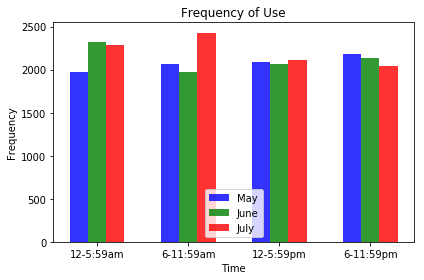

In [118]:
n_groups = 4
may_timedist= (may_earlymorning, may_morning, may_afternoon, may_evening)
june_timedist = (june_earlymorning, june_morning, june_afternoon, june_evening)
july_timedist = (july_earlymorning, july_morning, july_afternoon, july_evening)

plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, may_timedist, bar_width,
                 alpha=opacity,
                 color='b',
                 label='May')
 
rects2 = plt.bar(index + bar_width , june_timedist, bar_width,
                 alpha=opacity,
                 color='g',
                 label='June')

rects3 = plt.bar(index + bar_width+bar_width, july_timedist, bar_width,
                 alpha=opacity,
                 color='r',
                 label='July')
 
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Frequency of Use')
plt.xticks(index + bar_width, ('12-5:59am', '6-11:59am', '12-5:59pm', '6-11:59pm'))
plt.legend()
 
plt.tight_layout()
plt.show()

Even though the table above has the same information as the bar graph above, the bar graph is easlier to look at and it provides a clearer distinction of the amount of use at a given time for each month.  For example, between the times of 6 and 11:59 a.m, there was a higher amount of app activity in July compared to May and June.  This could be becasue July is when the summer is coming to a close and the OSXtern users want to ensure they have access to their contacts in the Tech scene prior to their program ending and/or going back to school. 

Based the information given, it is clear that there are many locations that have given a user a reason to use OSXtern. From a marketing standpoint, it would be best to advertise the app or TechPoint in those areas becuase it can trigger a user to use the app or entice someone in the Tech world to look into TechPoint. From the frequency of use data, there may be something particualr about a given month or time that would cause a TechPoint Talent member to use the app.  This could be becasue of a new friend made, a networking event or some other reason. 